In [103]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import csv

In [86]:
results_REF = pd.read_csv(r'C:\Users\nandi\Box Sync\PhD\Paper 3-OSeMOSYS 40x40\Results\Run 11 (MW GJ)\Run11_MW_GJ.csv', low_memory=False)
results_REF.set_index('Param')


,Country,tech,Cell,elec,Fuel,2012,2013,2014,2015,2016,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
Param,,,,,,,,,,,,,,,,,,,,,
AnnualTechnologyEmission,Kenya,KECOSCpn,NaN,NaN,CO2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.767753,1.897402,2.063134,2.387422,2.503148,2.726563e+00,2.799782e+00,2.793410e+00,2.797026e+00,2.796824e+00
AnnualTechnologyEmission,Kenya,KECOSCpn,NaN,NaN,NOX,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000030,0.000032,0.000035,0.000040,0.000042,4.570000e-05,4.690000e-05,4.680000e-05,4.690000e-05,4.690000e-05
AnnualTechnologyEmission,Kenya,KEDSCCph,NaN,NaN,CO2,1.212105e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
AnnualTechnologyEmission,Kenya,KEDSCCph,NaN,NaN,NOX,9.930000e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
AnnualTechnologyEmission,Kenya,KEDSGEN,115.0,NaN,CO2,1.040000e-08,2.760000e-09,2.770000e-09,2.580000e-10,2.790000e-09,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.550000e-07,1.580000e-07,1.620000e-07,1.650000e-07,1.680000e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TotalDiscountedCostByTechnology,Kenya,TRLV,97.0,0,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.691182e+00,1.554200e+00,7.725124e-01
TotalDiscountedCostByTechnology,Kenya,TRLV,98.0,0,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
TotalDiscountedCostByTechnology,Kenya,TRLV,99.0,0,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [112]:
years = ['2012','2013','2014','2015','2016','2017','2018','2019', '2020', '2021','2022','2023','2024','2025','2026','2027','2028','2029','2030','2031','2032', '2033', '2034','2035','2036','2037','2038','2039','2040']
prodtech = ["KEBMCHph", "KECOSCpn", "KEDSCCph", "KEDSGEN", "KEGOBIph", 'KEGOFSph', 'KEHFCCph', 'KEHYDMph2', 'KEHYDMph3', 'KEHYDMph3GI', 'KEHYDMph3KA', 'KEHYDMph3KIA','KEHYDMph3KIN'
           'KEHYDMph3MA', 'KEHYRRph1', 'KENGCCpn', 'KESOU1ph', 'KEWI25ph', 'SOMG12h', 'SOMG', 'SOPV12h', 'SOPV8h', 'SOPV']
transmission_lv = ['TRLV', 'KEEL00d']
transmission_hv = ['TRHV', 'KEEL00t00']
with open(r'C:\Users\nandi\Box Sync\PhD\Paper 3-OSeMOSYS 40x40\Geosemosys\Generate BIG dd file - Copy\GEOSeMOSYS code\GEOSeMOSYS\data\elec.csv', newline='') as f:
    reader = csv.reader(f)
    elec_cell = list(reader)
type(elec_cell)

list

## Production (GJ)

In [117]:
gk = results_REF.groupby('Param')
production = gk.get_group('ProductionByTechnologyAnnual')


In [118]:
gr_p = production[production['tech'].isin(prodtech)]

prod = pd.pivot_table(gr_p, values=years, index='tech', aggfunc=np.sum )

gr_p

,Param,Country,tech,Cell,elec,Fuel,2012,2013,2014,2015,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
2729,ProductionByTechnologyAnnual,Kenya,KEBMCHph,NaN,NaN,KEEL1,1494.119690,644.400000,644.400000,644.400000,...,5146.675149,5146.675149,5146.675149,5146.675149,5146.675149,5146.675149,5146.675149,5146.675149,5146.675149,5146.675149
2731,ProductionByTechnologyAnnual,Kenya,KECOSCpn,NaN,NaN,KEEL1,0.000000,0.000000,0.000000,0.000000,...,19533.183620,20965.764710,22797.064660,26380.358070,27659.094510,30127.769640,30936.815690,30866.414180,30906.363990,30904.134460
2733,ProductionByTechnologyAnnual,Kenya,KEDSCCph,NaN,NaN,KEEL1,174.585451,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2734,ProductionByTechnologyAnnual,Kenya,KEDSGEN,115.0,NaN,EL2_115,0.000151,0.000040,0.000040,0.000004,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002252,0.002295,0.002341,0.002388,0.002434
2735,ProductionByTechnologyAnnual,Kenya,KEDSGEN,117.0,NaN,EL2_117,0.000006,0.000002,0.000002,0.000002,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002155,0.002155,0.002155,0.002155,0.002155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3930,ProductionByTechnologyAnnual,Kenya,SOPV,94.0,0,EL3_94_0,0.000000,0.000000,0.000000,0.000000,...,6.606076,6.757189,6.912202,7.069164,7.228077,7.377955,7.532104,7.686253,9.034410,8.158262
3931,ProductionByTechnologyAnnual,Kenya,SOPV,94.0,1,EL3_94_1,0.000000,0.000000,0.000000,0.000000,...,0.243734,0.301273,0.330009,0.385247,0.411506,0.432838,0.463424,0.495730,0.579884,0.564187
3932,ProductionByTechnologyAnnual,Kenya,SOPV,95.0,0,EL3_95_0,0.000000,0.000000,0.000000,0.000000,...,1.418071,1.318985,1.269863,1.354407,1.949800,1.129001,1.650445,1.377912,1.634801,1.854706
3933,ProductionByTechnologyAnnual,Kenya,SOPV,97.0,0,EL3_97_0,0.000000,0.000000,0.000000,0.000000,...,3.921566,3.983278,3.942094,4.211724,4.302509,4.209134,4.399226,4.304792,3.751159,3.584210


In [119]:
gr_p_elec = production[production['Cell'].isin(elec_cell)]
gr_p_elec

,Param,Country,tech,Cell,elec,Fuel,2012,2013,2014,2015,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040


ConversionError: Failed to convert value(s) to axis units: ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039', '2040']

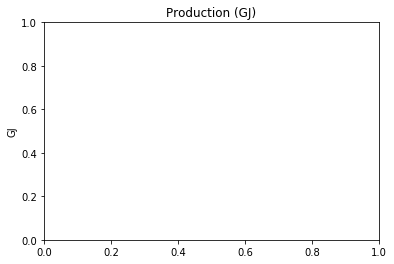

In [120]:
ind = years    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p = plt.bar(ind, prod, width)


plt.ylabel('GJ')
plt.title('Production (GJ)')
plt.xticks(years)
plt.yticks(np.arange(0, 10000, 20000, 30000))
plt.legend((p[0]), (prodtech))

plt.show()

In [79]:
gr_t_lv = production[production['tech'].isin(transmission_lv)]
tr_lv = pd.pivot_table(gr_t_lv, values=years, index='tech', aggfunc=np.sum )

tr_lv

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
tech,,,,,,,,,,,,,,,,,,,,,
KEEL00d,1125.805166,1125.805275,1206.021689,1275.105232,1360.558120,1450.089408,1545.902590,1645.763883,1726.134317,1846.001897,...,2711.049189,2857.057695,3008.868253,3109.373378,3305.383713,3464.365789,3645.614759,3827.325992,4021.996741,4201.457702
TRLV,2.279459,2.279459,2.279459,2.279459,2.279459,4.571368,5.815443,7.049468,9.031158,10.706604,...,40.374264,40.725122,41.188211,41.416525,41.687517,42.139821,43.352053,45.032685,47.309273,49.755626


In [80]:
gr_t_hv = production[production['tech'].isin(transmission_hv)]
tr_hv = pd.pivot_table(gr_t_hv, values=years, index='tech', aggfunc=np.sum )

tr_hv

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
tech,,,,,,,,,,,,,,,,,,,,,
KEEL00t00,1176.527813,1177.225924,1261.106127,1333.345082,1422.701182,1516.326116,1616.528210,1721.357751,1802.011500,1931.512235,...,2515.106056,2612.249370,2761.995787,2884.235090,3081.794490,3228.164365,3396.649140,3570.449294,3759.125505,3935.958175
TRHV,0.000000,0.000000,0.000000,0.000000,0.000000,1.963588,2.979658,3.965038,5.662656,7.150651,...,34.473092,34.503941,34.593828,34.686272,34.877036,35.259649,36.219566,37.700723,39.807984,42.120207


## Capacity (MW)

In [81]:
gk = results_REF.groupby('Param')
capacity = gk.get_group('TotalCapacityAnnual')

In [82]:
gr_c = capacity[capacity['tech'].isin(prodtech)]

cap = pd.pivot_table(gr_c, values=years, index='tech', aggfunc=np.sum )
cap

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
tech,,,,,,,,,,,,,,,,,,,,,
KEBMCHph,165.792893,165.792893,165.792893,165.792893,165.792893,165.792893,165.792893,165.792893,165.792893,165.792893,...,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
KECOSCpn,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,981.000000,...,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
KEDSCCph,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
KEDSGEN,2.279459,2.279168,2.279459,2.279459,2.279459,2.281713,2.282049,2.282049,2.282049,2.282049,...,0.002667,0.000413,0.000077,0.000077,0.000165,0.014592,0.014654,0.014841,0.014945,0.014991
KEGOBIph,110.000000,180.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,...,274.000000,274.000000,274.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
KEGOFSph,158.000000,250.000000,303.000000,358.000000,358.000000,358.000000,358.000000,358.000000,398.496310,689.000000,...,689.000000,689.000000,689.000000,689.000000,689.000000,531.000000,531.000000,610.212497,768.431212,932.263548
KEHFCCph,277.464413,445.464413,645.464413,805.464413,805.464413,805.464413,805.464413,805.464413,805.464413,805.464413,...,662.464413,617.000000,617.000000,528.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
KEHYDMph2,146.800000,146.800000,146.800000,146.800000,146.800000,146.800000,146.800000,146.800000,146.800000,146.800000,...,146.800000,146.800000,146.800000,146.800000,146.800000,146.800000,146.800000,146.800000,146.800000,146.800000
KEHYDMph3,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,...,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000


In [83]:
gr_t_lv_cap = capacity[capacity['tech'].isin(transmission_lv)]
tr_lv_cap = pd.pivot_table(gr_t_lv_cap, values=years, index='tech', aggfunc=np.sum )

tr_lv_cap

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
tech,,,,,,,,,,,,,,,,,,,,,
KEEL00d,1125.805166,1125.805275,1206.021689,1275.105232,1360.558120,1450.089408,1545.902590,1645.763883,1726.134317,1846.001897,...,2711.049189,2857.057695,3008.868253,3109.373378,3305.383713,3464.365789,3645.614759,3827.325992,4021.996741,4201.457702
TRLV,2.279459,2.279459,2.279459,2.279459,2.279459,4.571368,5.815443,7.049468,9.031158,10.706604,...,40.374264,40.725122,41.188211,41.416525,41.687517,42.139821,43.352053,45.032685,47.309273,49.755626


In [84]:
gr_t_hv_cap = capacity[capacity['tech'].isin(transmission_hv)]
tr_hv_cap = pd.pivot_table(gr_t_hv_cap, values=years, index='tech', aggfunc=np.sum )

tr_hv_cap

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
tech,,,,,,,,,,,,,,,,,,,,,
KEEL00t00,1176.527813,1177.225924,1261.106127,1333.345082,1422.701182,1516.326116,1616.528210,1721.357751,1802.011500,1931.512235,...,2515.106056,2612.249370,2761.995787,2884.235090,3081.794490,3228.164365,3396.649140,3570.449294,3759.125505,3935.958175
TRHV,0.000000,0.000000,0.000000,0.000000,0.000000,1.963588,2.979658,3.965038,5.662656,7.150651,...,34.473092,34.503941,34.593828,34.686272,34.877036,35.259649,36.219566,37.700723,39.807984,42.120207
